## Auto

## Intro

In this case study we are trying to determine what affects MPG the most. We  will be using the "Auto" dataset. 
This dataset is fairly old, as the vehicles range from 1970-1982. The principle purpose of this study is to use R, and analyze the data visually and graphically. 

## Methodology

In this study we will first use visualization tools to determine the most important variables, and then use statistical methods to determine the variables that contribute to MPG the most.

In [14]:
library(ISLR)
library(ggplot2)
library(MASS)
library(dplyr)
library(car)
library(stats) 
library(knitr)

In [15]:
#Import Data
auto = Auto

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


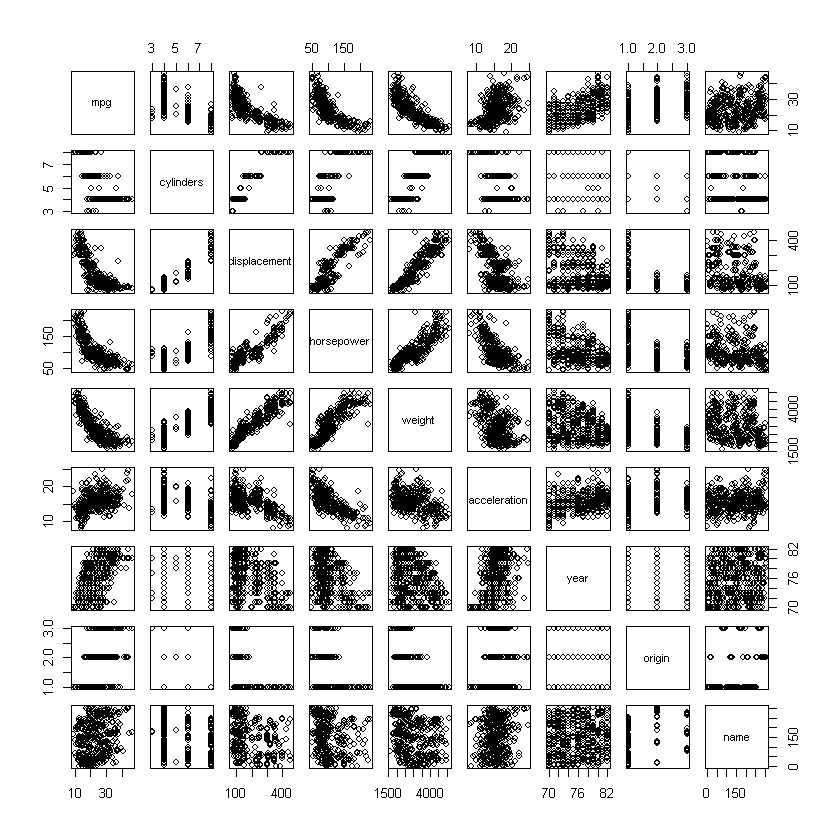

In [16]:
#Explore Data
str(auto)
summary(auto)
colnames(auto)
head(auto, n=10)
#Explore Data
plot(auto)

Based on the graphs above we can see a relationship between mpg and displacement, horsepower, weight and year.

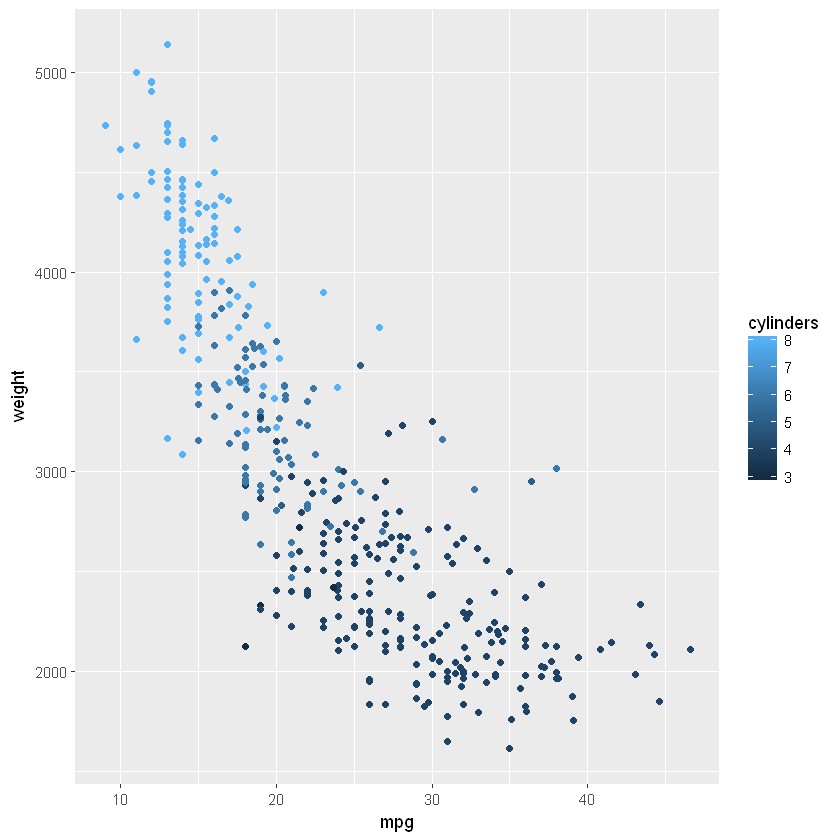

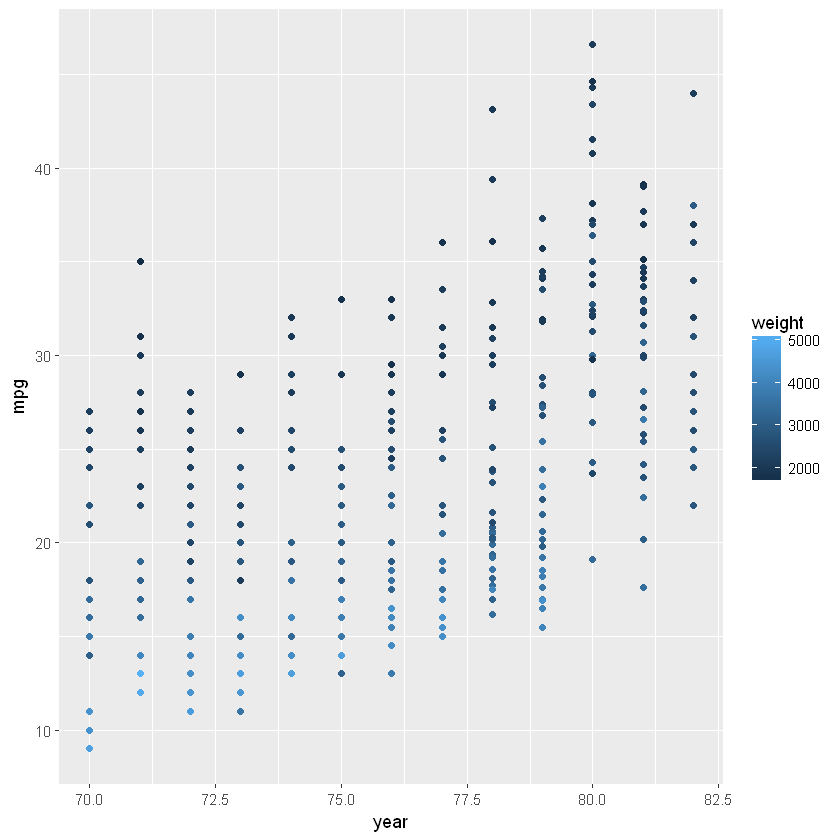

In [17]:
#Relationship between mpg and displacement, horsepower, weight, year
ggplot(auto, aes(x = mpg, y = weight)) + geom_point(aes(color = cylinders))
ggplot(auto, aes(x = year, y = mpg)) + geom_point(aes(color = weight))

## Graphical Analysis
We can clearly see that heavier cars have more cylinders, lighter vehicles have less cylinders and give more mpg.

It is also worth obseving that over a short span of 12 years, the weight of the cars has reduced by approximately 3000lbs, and mpg has shifted from a maximum of 27mpg to 47mpg.

This is a significant rise. It is enough to investigate the reason for such a spike, manufacturing techniques or perhaps emission regulations.

In [18]:
autoModel1 = lm(mpg ~ cylinders + horsepower + weight + displacement + year + acceleration, data = auto)
summary(autoModel1)


Call:
lm(formula = mpg ~ cylinders + horsepower + weight + displacement + 
    year + acceleration, data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6927 -2.3864 -0.0801  2.0291 14.3607 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.454e+01  4.764e+00  -3.051  0.00244 ** 
cylinders    -3.299e-01  3.321e-01  -0.993  0.32122    
horsepower   -3.914e-04  1.384e-02  -0.028  0.97745    
weight       -6.795e-03  6.700e-04 -10.141  < 2e-16 ***
displacement  7.678e-03  7.358e-03   1.044  0.29733    
year          7.534e-01  5.262e-02  14.318  < 2e-16 ***
acceleration  8.527e-02  1.020e-01   0.836  0.40383    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.435 on 385 degrees of freedom
Multiple R-squared:  0.8093,	Adjusted R-squared:  0.8063 
F-statistic: 272.2 on 6 and 385 DF,  p-value: < 2.2e-16


Weight and year are very significant.

In [19]:
#Determine coliniarity 
fitvif <- lm(mpg ~ cylinders+displacement+horsepower+weight+acceleration+year, data = auto)
show(vif(fitvif))
#displacement has the highest VIF (above ~10)

   cylinders displacement   horsepower       weight acceleration         year 
   10.633049    19.641683     9.398043    10.731681     2.625581     1.244829 


In [20]:
#variable selection
#using stepwise selection
fit <- lm(mpg ~ cylinders+displacement+horsepower+weight+acceleration+year, data = auto)
step <- stepAIC(fit, direction="both", trace=FALSE)
summary(step)$coeff
summary(step)$r.squared
#shows adjusted R^2 to be 80%, meaning weight and year explain 80% of the variation in mpg. (Adequate model)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.347253018,4.0065185631,-3.580978,3.856624e-04
weight,-0.006632075,0.0002145559,-30.910708,8.361624e-107
year,0.757318281,0.0494726873,15.307806,9.772260e-42


[1] 0.8081803

In [21]:
#test each parameter via nested likelihood ratio test
fit1 <- lm(mpg ~ weight, data = auto)
fit2 <- lm(mpg ~ weight+year, data = auto)
fit3 <- lm(mpg ~ weight+year+cylinders, data = auto)
fit4 <- lm(mpg ~ weight+year+cylinders+horsepower, data = auto)
fit5 <- lm(mpg ~ weight+year+cylinders+horsepower+acceleration, data = auto)
anova(fit1, fit2, fit3, fit4, fit5)
#note the spike in sum of squares when we run fit2 (weight + year)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
390,7321.234,NA,NA,NA,NA
389,4568.952,1,2752.281665,233.1725876,1.622879e-41
388,4563.994,1,4.958104,0.4200493,5.172978e-01
387,4562.392,1,1.601499,0.1356786,7.128174e-01
386,4556.199,1,6.193386,0.5247021,4.692816e-01


In [22]:
#final Model
finalfit <- lm(mpg ~ weight+year, data = auto)
summary(finalfit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.347253018,4.0065185631,-3.580978,3.856624e-04
weight,-0.006632075,0.0002145559,-30.910708,8.361624e-107
year,0.757318281,0.0494726873,15.307806,9.772260e-42


In [23]:
#detect colliniarity 
fitvif <- lm(mpg ~ weight+year, data = auto)
show(vif(fitvif))
#we are okay ( no values above ~10)

  weight     year 
1.105651 1.105651 


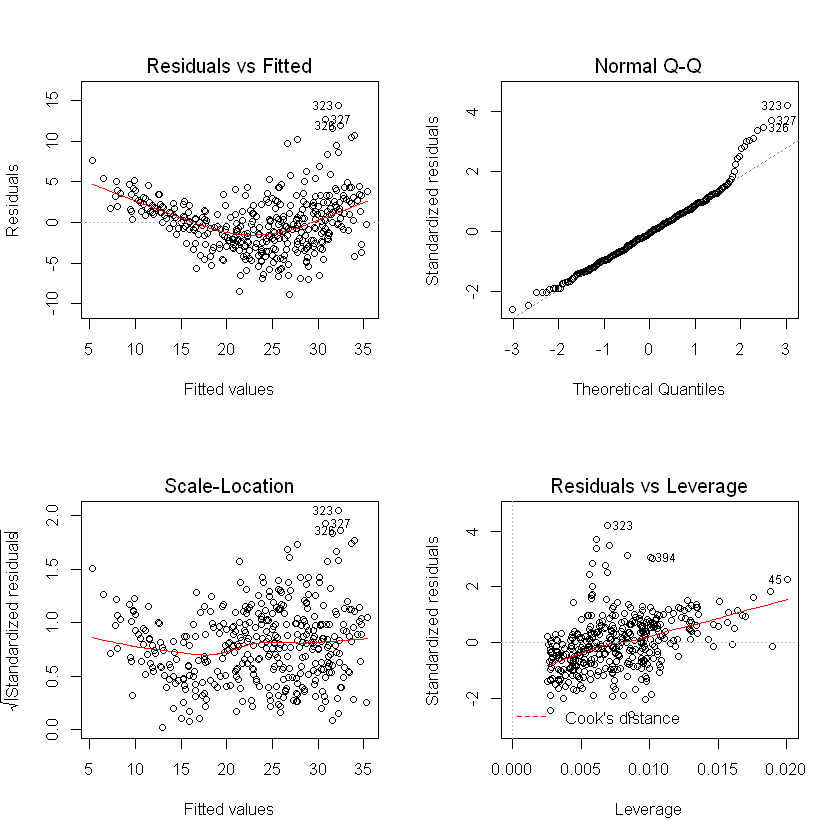

In [24]:
#residual plot
par(mfrow=c(2,2))
plot(fitvif)

## Conclusion

The visibility of a distinct pattern in our residual plot indicates that further transformation can be done on our dataset. An ideal residual plot should show no disticnt patterns.

In conclusion, the visual and statistical methods showed that the model year and the weight of the car have the greatest impact on the mpg of a vehicle. The VIF feature statistically confirmed what we saw in the graphical representation of the data. That model year and weight have the greatest impact on mpg.

It was interesting to see how much of an effect year has over the mpg of a car. Although we lack the data to support it, superior manufacturing and engineering techniques lead to lighter vehicles over the years. 
Many emissions requirements were stiffened which forced car manufacturures to reduce gasoline consumption.
Although a simple dataset, it was an excellent adventure into feature selection based on basic investigative work and VIF.